In [195]:
import matplotlib.pyplot as plt
import pandas as pd

In [196]:
# Create a sample DataFrame
data = {'A': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Create a new column 'B' with consecutive values
df['B'] = df['A'].shift(fill_value=0) - 1

# Display the updated DataFrame
print(df)

    A   B
0  10  -1
1  20   9
2  30  19
3  40  29
4  50  39


In [197]:
track_record = pd.read_csv('track_record.csv')
#track_record['return2'] = track_record['return'].shift(fill_value=0)-1
#track_record['return2'] = track_record['return'] - 1
#track_record['return3'] = track_record['return'] + track_record['return'].shift(fill_value=0)-1
#track_record['return3'] = track_record['return'] + track_record['return'].shift(fill_value=0)-1
#track_record['return4'] = track_record['return2'].cumsum()

set_inital = pd.DataFrame({'game_id': ["0000000"], "return": [1]})

#track_record = pd.concat([set_inital, track_record]).reset_index(drop=True)
#track_record['stake'] = track_record['return'].shift(fill_value=1)
#track_record['return_shifted'] = track_record['return'].shift(periods=-1)
track_record

,game_id,return,Datetime
0,2738735,0.857280,2019-04-27
1,2738739,0.000000,2019-04-27
2,2738740,1.600000,2019-04-27
3,2740879,0.865069,2019-04-28
4,2740882,2.429597,2019-04-28
5,2740887,1.223512,2019-04-28
6,2740886,1.080374,2019-04-28
7,2740885,2.090653,2019-04-28
8,2740906,1.332699,2019-04-28
9,2740905,1.403831,2019-04-28


In [198]:
stake = [1]
current_stake = 1
for i in track_record['return']:
    current_stake = (current_stake-1) + 1*i
    stake.append(current_stake)

stake

[1,
 0.8572800038990888,
 -0.14271999610091124,
 0.4572800038989884,
 0.3223489853025293,
 1.751946265803202,
 1.9754583101505685,
 2.055832111213072,
 3.1464846495426966,
 3.4791840454278224,
 3.883015431683114,
 4.326820055133185,
 3.326820055133185,
 3.611914669065606,
 2.611914669065606,
 3.1106706573780385,
 3.0998923741090656,
 3.463510521366749,
 2.463510521366749,
 2.964537476967585,
 2.9640747264629193,
 3.534074726427323,
 3.857745942148286,
 4.042522877089488,
 4.263715615864189,
 3.899365182089614,
 2.899365182089614,
 3.248120119744975,
 3.7901537863505013,
 2.7901537863505013,
 1.7901537863505013,
 0.7901537863505013,
 4.105344073629284,
 3.8991100237427494,
 3.8781469083877553,
 5.503146915315267,
 4.503146915315267,
 5.112925305677313,
 5.176971790379853,
 5.9311802487174745,
 7.281373122334083,
 7.709616713641649]

In [202]:
stake = [1]
current_stake = 1
percentage = 0.10
for i in track_record['return']:

    preserved_stake = current_stake * (1-percentage)
    bet_stake = current_stake*percentage
    current_stake = preserved_stake + bet_stake*i

    print(current_stake)

    stake.append(current_stake)

0.9857280003899089
0.8871552003509181
0.9403845123719643
0.9276958083592959
1.0603189488355282
1.0840183544269761
1.092731021983658
1.211910008267458
1.2522301810292302
1.3027991660208051
1.360617995351498
1.2245561958163482
1.2594676334048298
1.1335208700643469
1.190055902246518
1.1887732262844855
1.2319991780895958
1.1087992602806362
1.1643530920557228
1.164299211557627
1.2306642666122674
1.2704973265441415
1.2939731867291233
1.3225949340364878
1.2744061302440628
1.1469655172196564
1.1869665059647354
1.251304086701337
1.1261736780312033
1.013556310228083
0.9122006792052746
1.2146125623803181
1.1895631156020428
1.1870694207206016
1.3799682024100433
1.241971382169039
1.3177041131985154
1.3261435448313597
1.4261624126795245
1.6187218453015009
1.6880425709374935


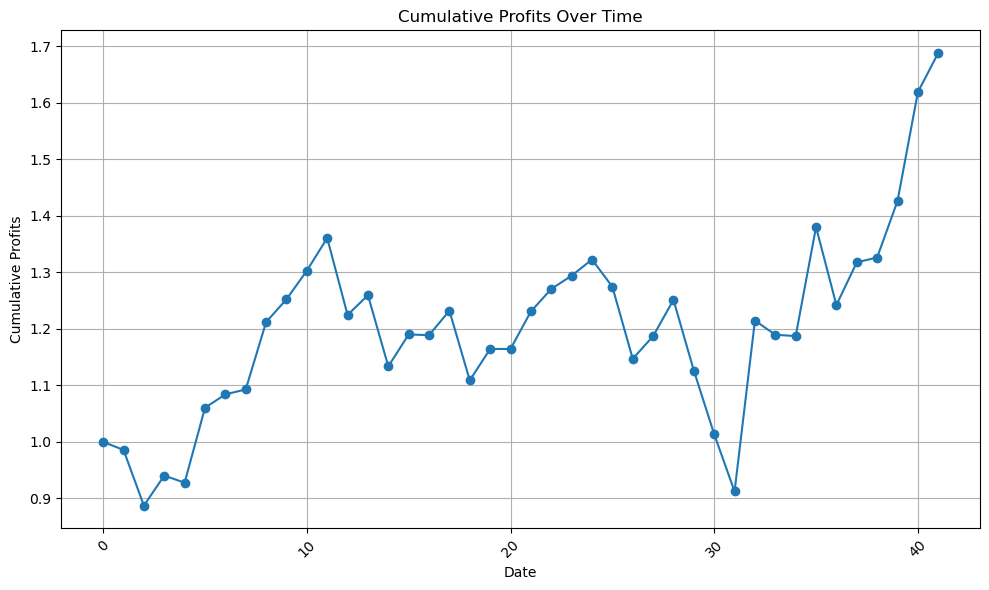

In [200]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(stake, marker='o', linestyle='-')
plt.title('Cumulative Profits Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Profits')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()